In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [16]:
df=pd.read_csv('../data/Season_2019.csv')

In [17]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [18]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [19]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [20]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [22]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [23]:
df.home_win.value_counts(normalize=True)

1    0.531319
0    0.468681
Name: home_win, dtype: float64

In [24]:
df2.home_win.value_counts(normalize=True)

1    0.542857
0    0.457143
Name: home_win, dtype: float64

In [25]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
1365,PHI,34.388889,4.777778,8.450617,4.580247,4.457963,3.469136,8.969136,38.648148,0.239568,...,10.870370,14.080247,6.302469,0.012346,48.283951,1.660494,0.604938,-0.046185,-0.594444,0
1366,BOS,35.617284,5.561728,9.592593,5.290123,5.152778,3.641975,8.530864,39.969136,0.263710,...,11.265432,13.018519,5.858025,0.000000,48.216049,1.481481,0.456790,-0.074901,-0.858642,0
1367,LAA,34.209877,4.746914,8.444444,4.530864,4.473765,3.617284,7.876543,38.586420,0.241494,...,12.262500,15.275000,6.950000,0.012500,50.937500,1.331250,0.368750,0.019687,0.099375,1
1368,STL,33.635802,4.716049,8.246914,4.407407,4.446173,3.462963,8.765432,38.067901,0.240457,...,11.611111,14.425926,6.685185,0.006173,50.320988,1.395062,0.456790,0.011432,-0.221605,1
1369,MIL,34.209877,4.746914,8.432099,4.592593,4.552593,3.882716,9.648148,38.944444,0.242580,...,11.574074,14.975309,6.549383,0.012346,53.783951,1.408805,0.490566,0.066025,0.515432,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,ATL,34.320988,5.277778,8.839506,5.086420,5.011049,3.820988,9.055556,38.901235,0.252728,...,11.364198,14.253086,6.351852,0.006173,50.135802,1.577640,0.534161,-0.024111,-0.288889,0
1816,TEX,34.197531,5.000000,8.481481,4.722222,4.666852,3.296296,9.740741,38.296296,0.242006,...,11.327160,15.012346,6.827160,0.006173,45.055556,1.552795,0.571429,-0.060099,-0.895679,0
1817,ARI,34.771605,5.018519,8.759259,4.802469,4.772222,3.333333,8.395062,38.981481,0.245272,...,11.574074,14.975309,6.549383,0.012346,53.783951,1.408805,0.490566,0.066025,0.515432,0
1818,NYY,34.462963,5.820988,9.216049,5.580247,5.632593,3.512346,8.870370,38.549383,0.262302,...,10.000000,14.617284,6.345679,0.000000,50.265432,1.596273,0.534161,0.014932,0.192593,0


In [26]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYY,34.462963,5.820988,9.216049,5.580247,5.632593,3.512346,8.870370,38.549383,0.262302,...,11.413580,16.395062,7.179012,0.000000,50.549383,1.385093,0.347826,0.068586,0.470370,1
1,TBR,34.740741,4.746914,8.808642,4.506173,4.573704,3.345679,9.216049,38.796296,0.249895,...,10.450617,13.179012,5.604938,0.018519,44.759259,1.679245,0.515723,-0.041290,-0.733333,0
2,TEX,34.197531,5.000000,8.481481,4.722222,4.666852,3.296296,9.740741,38.296296,0.242006,...,11.913580,13.555556,6.617284,0.000000,48.759259,1.487654,0.462963,-0.006420,-0.281481,0
3,MIA,34.024691,3.796296,8.185185,3.660494,3.545988,2.438272,9.067901,37.314815,0.234074,...,13.172840,14.685185,7.179012,0.000000,48.524691,1.347826,0.453416,0.017148,-0.015432,0
4,TOR,33.907407,4.481481,8.018519,4.302469,4.286975,3.141975,9.345679,37.598765,0.229025,...,11.869565,15.248447,6.645963,0.006211,54.776398,1.139241,0.316456,0.134677,1.446584,0


In [43]:
#for col in X_train.columns:
    #print(col)

In [11]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [67]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [12]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
1365,PHI,34.388889,4.777778,8.450617,4.580247,4.457963,3.469136,8.969136,38.648148,0.239568,...,10.870370,14.080247,6.302469,0.012346,48.283951,1.660494,0.604938,-0.046185,-0.594444,0
1366,BOS,35.617284,5.561728,9.592593,5.290123,5.152778,3.641975,8.530864,39.969136,0.263710,...,11.265432,13.018519,5.858025,0.000000,48.216049,1.481481,0.456790,-0.074901,-0.858642,0
1367,LAA,34.209877,4.746914,8.444444,4.530864,4.473765,3.617284,7.876543,38.586420,0.241494,...,12.262500,15.275000,6.950000,0.012500,50.937500,1.331250,0.368750,0.019687,0.099375,1
1368,STL,33.635802,4.716049,8.246914,4.407407,4.446173,3.462963,8.765432,38.067901,0.240457,...,11.611111,14.425926,6.685185,0.006173,50.320988,1.395062,0.456790,0.011432,-0.221605,1
1369,MIL,34.209877,4.746914,8.432099,4.592593,4.552593,3.882716,9.648148,38.944444,0.242580,...,11.574074,14.975309,6.549383,0.012346,53.783951,1.408805,0.490566,0.066025,0.515432,1


In [27]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [28]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [52]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [22]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [53]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

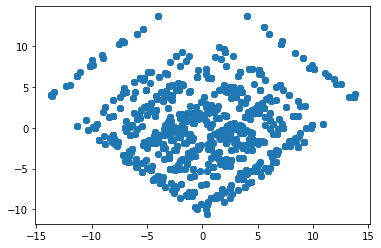

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [29]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [30]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

Penalty: l2
Solver: liblinear
Mean Cross-Val Score: 0.6010989010989011
Train Mean Accuracy: 0.6137362637362638
Test Mean Accuracy: 0.643956043956044
Recall Score: 0.6923076923076923
Precision Score: 0.6653696498054474
F1 Score: 0.6785714285714285


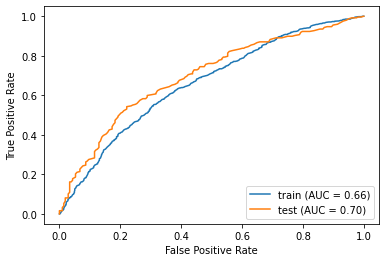

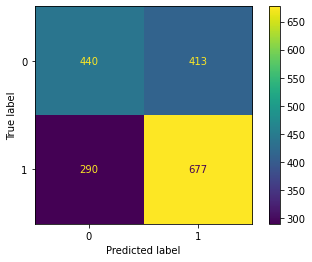

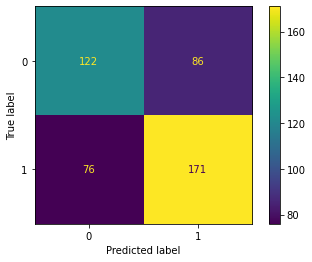

In [31]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [32]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

In [33]:
new_acc(probabilities)

(0.7213740458015268, 189)

### Home_win, zero imp
***

In [36]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [37]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l1
Solver: saga
Mean Cross-Val Score: 0.6002477620805227
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.6363636363636364
Recall Score: 0.5454545454545454
Precision Score: 0.6666666666666666
F1 Score: 0.6


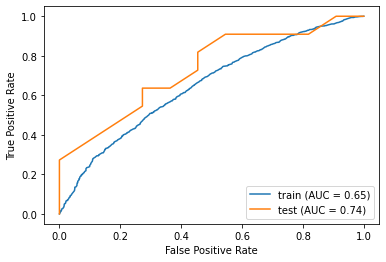

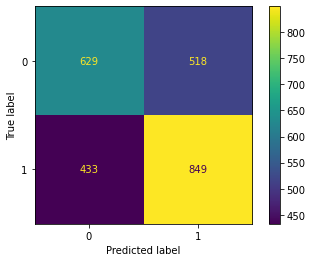

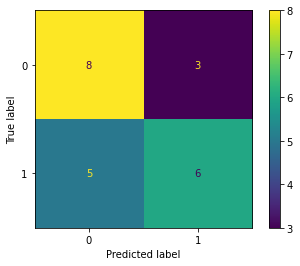

In [38]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [39]:
new_acc(probabilities)

0.65

### Explore thresehold movement and other things

In [94]:
logregs=LogisticRegression()
logregs.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
logregs.predict_proba(X_test_scaled)[:,1] >= 0.6

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False])

In [47]:
decisions = (logregs.predict_proba(X_test_scaled) >= .6).astype(int)
len(decisions)

54

In [97]:
today_winners = np.where(y_test!= predictions,'Away','Home')

In [101]:
today_winners

array(['Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away',
       'Away', 'Away', 'Home', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Away', 'Home', 'Away', 'Away', 'Home', 'Away', 'Home'],
      dtype='<U4')

7 out of 9 playoff series correctly predicted

# KNN

### Home win KNN

Number of Neighbors: 17
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.5741758241758241
Train Mean Accuracy: 0.6395604395604395
Test Mean Accuracy: 0.654945054945055
Recall Score: 0.7530364372469636
Precision Score: 0.6595744680851063
F1 score: 0.7032136105860113


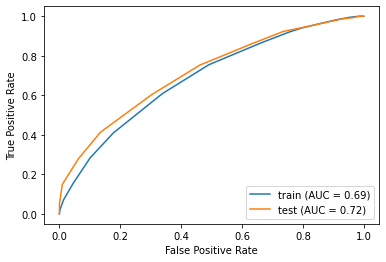

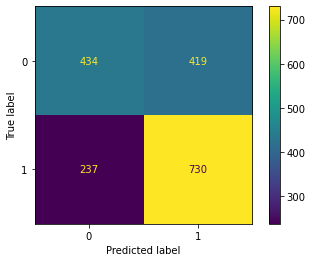

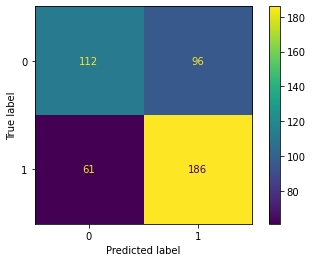

In [34]:
prediction,probabilities=knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [35]:
new_acc(probabilities)

(0.7696078431372549, 157)

# Decision Tree

In [24]:
dfeats= feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train_scaled[dfeats]
X_test_best_tree = X_test_scaled[dfeats]

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: entropy
Mean Cross-Val Score: 0.5784319714903907
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.5454545454545454
Precision Score: 0.6
F1 score: 0.5714285714285713


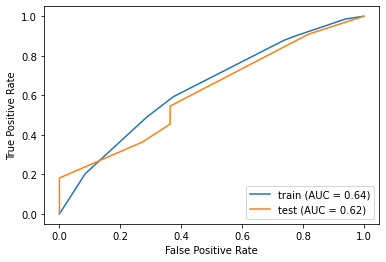

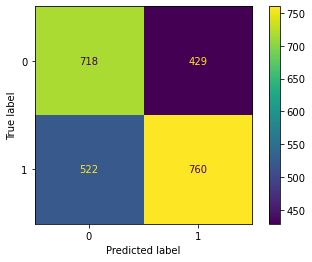

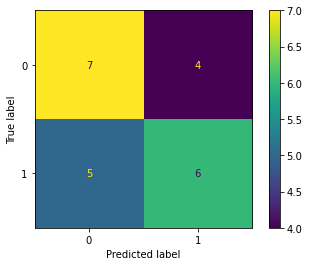

In [25]:
predictions,probabilities=dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

In [27]:
new_acc(probabilities)

0.5833333333333334

# Random Forest

In [36]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150,500],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    y_prob = rforest.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);
    
    return y_pred,y_prob


In [37]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 150
criterion: entropy
Mean Cross-Val Score: 0.5582417582417583
Train Mean Accuracy: 0.7098901098901099
Test Mean Accuracy: 0.7230769230769231
Recall Score: 0.728744939271255
Precision Score: 0.7531380753138075
F1 score: 0.7407407407407407


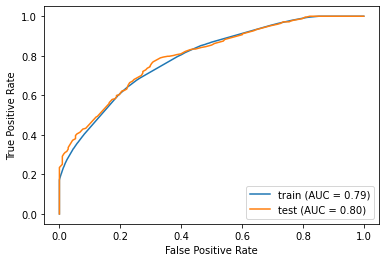

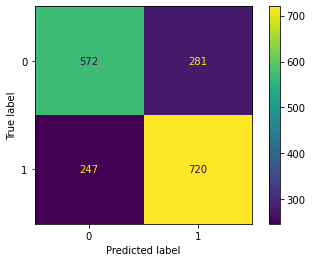

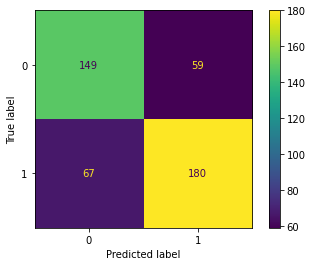

In [38]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [39]:
new_acc(probabilities)

(0.7642045454545454, 269)

# Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 3
Bag Max Features: 2
# of Base Estimators: 500
Mean Cross-Val Score: 0.5891468329727207
Train Mean Accuracy Score: 0.5673116508851379
Test Mean Accuracy Score: 0.5
Recall Score: 1.0
Precision Score: 0.5
F1 score: 0.6666666666666666


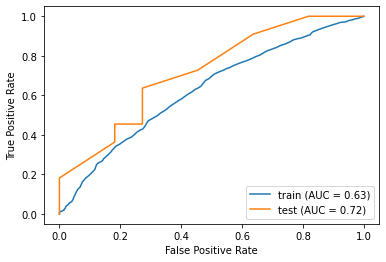

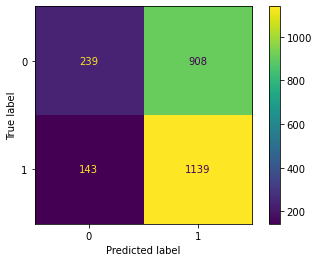

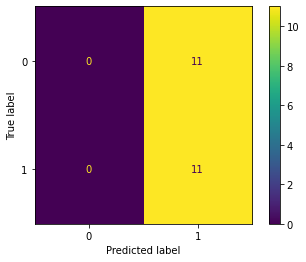

In [53]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

# XGBoost

In [56]:
xfeats= feature_select(zero_imp_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = zero_imp_train[xfeats]
X_test_best_x = zero_imp_test[xfeats]

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 1
XGBoost Subsample: 0.7
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.5409766238174027
Train Mean Accuracy Score: 0.6990531082750103
Test Mean Accuracy Score: 0.6363636363636364
Recall Score: 0.6363636363636364
Precision Score: 0.6363636363636364
F1 score: 0.6363636363636364


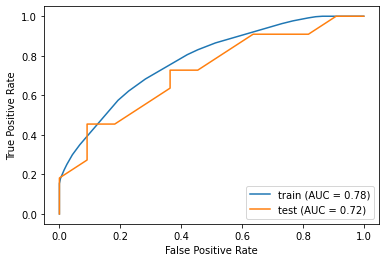

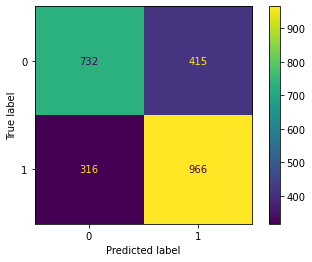

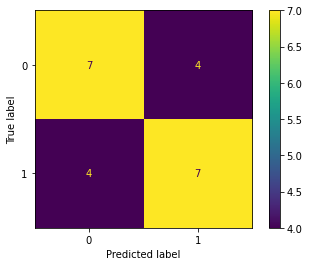

In [57]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)